# import lib's

In [1]:
import numpy as np
import cv2
import easyocr
import imutils

import matplotlib.pyplot as plt
%matplotlib inline

# Convert colored image into grayscale formate

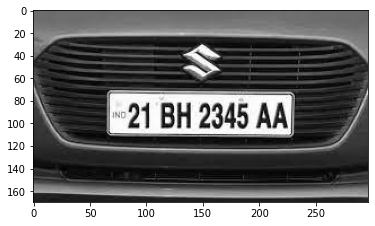

In [2]:
IMG_PATH = "SampleImages/car2.jpg"
img = cv2.imread(IMG_PATH)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

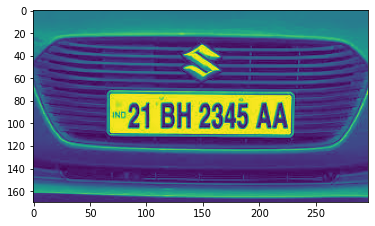

In [3]:
plt.imshow(gray)

# Apply Filter and Edge Detection

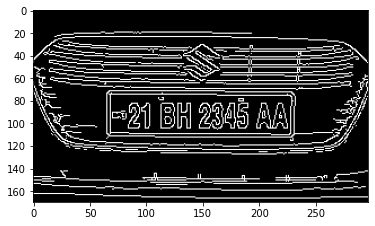

In [4]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) # Noise reduction
edged = cv2.Canny(bfilter, 30, 200) # Edge detection
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))

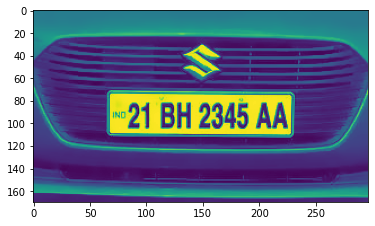

In [5]:
plt.imshow(bfilter)

# Find Contours and Apply Mask

In [6]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key = cv2.contourArea,reverse=True)[:10]

In [7]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour,10,True)
    if len(approx) == 4:
        location = approx
        break

In [8]:
location

array([[[ 68,  75]],

       [[227,  75]],

       [[228, 108]],

       [[ 69, 108]]], dtype=int32)

In [9]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

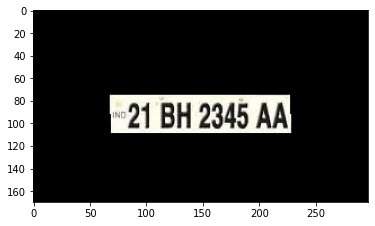

In [10]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

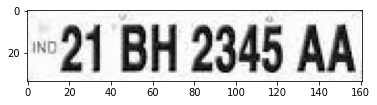

In [11]:
(x, y) = np.where(mask == 255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

# use easy ocr to read text

In [12]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[11, 1], [161, 1], [161, 34], [11, 34]],
  '21 BH 2345 AA',
  0.7191465079574835)]

In [13]:
result[0][0], result[0][1], result[0][2]

([[11, 1], [161, 1], [161, 34], [11, 34]], '21 BH 2345 AA', 0.7191465079574835)

In [14]:
number_plate = result[0][1]
number_plate.replace(" ", "")

'21BH2345AA'

In [ ]:
# Render Result

text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, 
                  text=text, 
                  org=(approx[0][0][0]-25, approx[1][0][1]-20), 
                  fontFace=font, 
                  fontScale=1, 
                  color=(0,255,0), 
                  thickness=2, 
                  lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0), 3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [ ]:
print(approx)

In [ ]:
print(approx[0][0])

In [ ]:
print(approx[2][0])

In [ ]:
'''
https://www.youtube.com/watch?v=AAPZLK41rek

https://www.youtube.com/watch?v=P7r0hIP2GQ4

https://www.youtube.com/watch?v=nOIVxi5yurE

https://www.youtube.com/channel/UCrydcKaojc44XnuXrfhlV8Q

https://docs.opencv.org/4.x/dd/d43/tutorial_py_video_display.html

https://www.e-consystems.com/blog/camera/technology/how-to-access-cameras-using-opencv-with-python/

https://subscription.packtpub.com/book/application-development/9781785283932/3/ch03lvl1sec28/accessing-the-webcam

https://www.geeksforgeeks.org/python-opencv-capture-video-from-camera/

https://www.google.com/search?q=opencv+webcam+python+example&rlz=1C1CHZL_enIN878IN879&sxsrf=ALiCzsbdWj_YNcIoI7rFiMpqams58wOPCg%3A1660963769856&ei=uUsAY5DwM92O3LUPg627iAM&oq=opencv+webcam+python&gs_lcp=Cgdnd3Mtd2l6EAMYATIFCAAQgAQyBQgAEIAEMgUIABCABDIGCAAQHhAWMgYIABAeEBYyBggAEB4QFjIGCAAQHhAWMgYIABAeEBYyBggAEB4QFjIGCAAQHhAWOgcIABBHELADOgUIABCRAjoICAAQHhAPEBZKBAhBGABKBAhGGABQ5htYjCtg-VBoAXABeACAAagCiAGxCpIBBTAuMi40mAEAoAEByAEIwAEB&sclient=gws-wiz



https://www.youtube.com/watch?v=7ryde8Cz-Cs

https://www.youtube.com/watch?v=C82lT9cWQiA

https://www.youtube.com/watch?v=9di4_ZJqawU&t=29s






'''

In [1]:
# https://www.youtube.com/watch?v=Ohj-CqALrwk
import sqlite3 as sql

In [2]:
connection = sql.connect("car_data.db")
cursor = connection.cursor()

In [3]:
cursor.execute("""create table IF NOT EXISTS car_info (
                                                        number_plate text PRIMARY KEY, 
                                                        owner_name text NOT NULL, 
                                                        address text NOT NULL, 
                                                        phone_number int NOT NULL, 
                                                        email_id text NOT NULL UNIQUE); 
                                                        """)
connection.commit()

In [4]:
car_info_list =[
    ("21BH2345AA", "David D. McDermott", "3317 Black Stallion Road Lexington, KY 40507", 8594228349, "devidD@gmail.com"),
    ("DL7CQ1939", "John M. Baez", "3986 Hiddenview Drive Philadelphia, PA 19144", 2159513344, "JohnMBaez@teleworm.us"),
    ("MH20EJ0365", "William P. Torres", "4244 Gambler Lane Houston, TX 77060", 2819464694, "WilliamPTorres@dayrep.com"),
    ("15LK10898", "Fred T. Coffman", "Joachimstaler Str. 85 56357 Ehr", 6772788287, "FredTCoffman@rhyta.com"),
    ("MH12DE1433", "Abbudin Ziyad Rahal", "Guntzelstrasse 11 54673 Dauwelshausen", 6524271065, "AbbudinZiyadRahal@teleworm.us"),
    ("WB06F977", "Laura Santos Ferreira", "1558 Marcus Street Huntsville, AL 35802", 2565953711, "LauraSantosFerreira@armyspy.com"),
    ("MH04AB1007", "Xin Qian Pan", "3547 Mutton Town Road Neah Bay, WA 98357", 3606452039, "XinQianPan@teleworm.us"),
    ("KA24CT2616", "Dana Selezneva", "Via Valpantena, 147 45030-Guarda Veneta RO", 3519126159, "DanaSelezneva@rhyta.com"),
    ("GJ34BH1992", "Nora Denisova", "Via Rosmini, 128 84040-Castel Ruggero SA", 3585020348, "NoraDenisova@dayrep.com"),
    ("DH12ZC5646", "Karina Mordvinova", "Via Callicratide, 33 11011-Leverogne AO", 3658078102, "KarinaMordvinova@teleworm.us"),
    ("MH04DA3423", "Talon Meunier", "Via Scuderlando, 58 64020-Sant'Atto TE", 3335566493, "TalonMeunier@dayrep.com")
]

In [5]:
cursor.executemany("insert into car_info values (?,?,?,?,?)", car_info_list)
connection.commit()

In [6]:
car_info_tuple = ("MH48DA2534", "Cosimo Brown", "ul. Słomiana 39 81-072 Gdynia", 696387982, "CosimoBrown@armyspy.com")
cursor.execute("insert into car_info values (?,?,?,?,?);", car_info_tuple)
connection.commit()

In [7]:
# print dataset rows
for row in cursor.execute("select * from car_info;"):
    print(row)

('21BH2345AA', 'David D. McDermott', '3317 Black Stallion Road Lexington, KY 40507', 8594228349, 'devidD@gmail.com')
('DL7CQ1939', 'John M. Baez', '3986 Hiddenview Drive Philadelphia, PA 19144', 2159513344, 'JohnMBaez@teleworm.us')
('MH20EJ0365', 'William P. Torres', '4244 Gambler Lane Houston, TX 77060', 2819464694, 'WilliamPTorres@dayrep.com')
('15LK10898', 'Fred T. Coffman', 'Joachimstaler Str. 85 56357 Ehr', 6772788287, 'FredTCoffman@rhyta.com')
('MH12DE1433', 'Abbudin Ziyad Rahal', 'Guntzelstrasse 11 54673 Dauwelshausen', 6524271065, 'AbbudinZiyadRahal@teleworm.us')
('WB06F977', 'Laura Santos Ferreira', '1558 Marcus Street Huntsville, AL 35802', 2565953711, 'LauraSantosFerreira@armyspy.com')
('MH04AB1007', 'Xin Qian Pan', '3547 Mutton Town Road Neah Bay, WA 98357', 3606452039, 'XinQianPan@teleworm.us')
('KA24CT2616', 'Dana Selezneva', 'Via Valpantena, 147 45030-Guarda Veneta RO', 3519126159, 'DanaSelezneva@rhyta.com')
('GJ34BH1992', 'Nora Denisova', 'Via Rosmini, 128 84040-Castel 

In [13]:
# print spesific row
cursor.execute("select * from car_info where number_plate=:np;", {"np":"21BH2345AA"})
get_number_plate = cursor.fetchall()
print(get_number_plate)

if len(get_number_plate)>0:
    print(get_number_plate[0])    

[('21BH2345AA', 'David D. McDermott', '3317 Black Stallion Road Lexington, KY 40507', 8594228349, 'devidD@gmail.com')]
('21BH2345AA', 'David D. McDermott', '3317 Black Stallion Road Lexington, KY 40507', 8594228349, 'devidD@gmail.com')


In [ ]:
# connection.close()